<a href="https://colab.research.google.com/github/PriyanshuGupta1/TnT/blob/master/TnT_day_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix, recall_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings('ignore')

sns.set(style="darkgrid")
%matplotlib inline 

In [12]:
income_df_master = pd.read_excel("/content/Income.xlsx", na_values=[" ?"])
income_df_master

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45.0,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0.0,0.0,28.0,United-States,"less than or equal to 50,000"
1,24.0,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0.0,0.0,40.0,United-States,"less than or equal to 50,000"
2,44.0,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,40.0,United-States,"greater than 50,000"
3,27.0,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0.0,0.0,40.0,Mexico,"less than or equal to 50,000"
4,20.0,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0.0,0.0,35.0,United-States,"less than or equal to 50,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34.0,Local-gov,HS-grad,Never-married,Farming-fishing,Not-in-family,Black,Male,594.0,0.0,60.0,United-States,"less than or equal to 50,000"
31974,34.0,Local-gov,Some-college,Never-married,Protective-serv,Not-in-family,White,Female,0.0,0.0,40.0,United-States,"less than or equal to 50,000"
31975,23.0,Private,Some-college,Married-civ-spouse,Adm-clerical,Husband,White,Male,0.0,0.0,40.0,United-States,"less than or equal to 50,000"
31976,42.0,Local-gov,Some-college,Married-civ-spouse,Adm-clerical,Wife,White,Female,0.0,0.0,40.0,United-States,"less than or equal to 50,000"


In [13]:
income_df = income_df_master.copy()
income_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            31978 non-null  float64
 1   JobType        31978 non-null  object 
 2   EdType         31978 non-null  object 
 3   maritalstatus  31978 non-null  object 
 4   occupation     31978 non-null  object 
 5   relationship   31978 non-null  object 
 6   race           31978 non-null  object 
 7   gender         31978 non-null  object 
 8   capitalgain    31978 non-null  float64
 9   capitalloss    31978 non-null  float64
 10  hoursperweek   31978 non-null  float64
 11  nativecountry  31978 non-null  object 
 12  SalStat        31978 non-null  object 
dtypes: float64(4), object(9)
memory usage: 3.2+ MB


In [14]:
income_df = income_df.fillna(income_df.mode().iloc[0])
income_df.SalStat = income_df.SalStat.apply(lambda x: 0 if x == ' less than or equal to 50,000' else 1)

In [15]:
income_df.describe()

,age,capitalgain,capitalloss,hoursperweek,SalStat
count,31978.000000,31978.000000,31978.000000,31978.000000,31978.000000
mean,38.579023,1064.360623,86.739352,40.417850,0.240634
std,13.662085,7298.596271,401.594301,12.345285,0.427475
min,17.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,99999.000000,4356.000000,99.000000,1.000000


In [16]:
X = income_df.drop(["relationship", "capitalgain", "capitalloss", "capitalloss", "SalStat"], axis=1)
Y = income_df["SalStat"]
X.head()


,age,JobType,EdType,maritalstatus,occupation,race,gender,hoursperweek,nativecountry
0,45.0,Private,HS-grad,Divorced,Adm-clerical,White,Female,28.0,United-States
1,24.0,Federal-gov,HS-grad,Never-married,Armed-Forces,White,Male,40.0,United-States
2,44.0,Private,Some-college,Married-civ-spouse,Prof-specialty,White,Male,40.0,United-States
3,27.0,Private,9th,Never-married,Craft-repair,White,Male,40.0,Mexico
4,20.0,Private,Some-college,Never-married,Sales,White,Male,35.0,United-States


In [31]:
labels = ['JobType', 'EdType', 'maritalstatus', 'occupation', 'race', 'gender', 'nativecountry']
features = [X["age"].to_numpy().reshape(-1,1), X["hoursperweek"].to_numpy().reshape(-1,1)]

for l in labels:
  le = LabelEncoder()
  jt = le.fit_transform(X[l])
  ohe = OneHotEncoder()
  features.append(ohe.fit_transform(jt.reshape(-1,1)).toarray())
 
X_arr = np.hstack(features)
sc = StandardScaler()
X_arr = sc.fit_transform(X_arr)
print(X_arr.shape)

(31978, 97)


In [19]:
train_X, test_X, train_y, test_y = train_test_split(X_arr, Y, train_size = 0.3, random_state=42, stratify=Y)
print("Train:", train_X.shape, train_y.shape)

Train: (9593, 97) (9593,)


In [20]:
results = pd.DataFrame(columns=["algorithm","accuracy","precision","recall","f1"])


In [30]:
algorithm = "Logistic Repression"

logR = LogisticRegression()
logR.fit(train_X, train_y)
preds = logR.predict(test_X)

acc = accuracy_score(test_y, preds)
prec = precision_score(test_y, preds)
f1 = f1_score(test_y, preds)
rec = recall_score(test_y, preds)

results = results.append({
 "algorithm": algorithm,
 "accuracy": acc,
 "precision": prec,
 "recall": rec,
 "f1": f1
}, ignore_index=True)

In [22]:

print(f"Accuracy: [{acc}], precision: [{prec}], f1-score: [{f1}]")
print(confusion_matrix(test_y, preds))

Accuracy: [0.8327004690641054], precision: [0.6896950092421442], f1-score: [0.6145136387030364]
[[15655  1343]
 [ 2402  2985]]


In [32]:
algorithm = "k-NN"

knn = KNeighborsClassifier()
knn.fit(train_X, train_y)
preds = knn.predict(test_X)

acc = accuracy_score(test_y, preds)
prec = precision_score(test_y, preds)
f1 = f1_score(test_y, preds)
rec = recall_score(test_y, preds)

results = results.append({
 "algorithm": algorithm,
 "accuracy": acc,
 "precision": prec,
 "recall": rec,
 "f1": f1
}, ignore_index=True)


In [24]:
print(f"Accuracy: [{acc}], precision: [{prec}], f1-score: [{f1}]")
print(confusion_matrix(test_y, preds))


Accuracy: [0.8102747375474648], precision: [0.6176227816756088], f1-score: [0.5849701944688752]
[[15145  1853]
 [ 2394  2993]]


In [33]:
algorithm = "Decision Tree"

dt = DecisionTreeClassifier()
dt.fit(train_X, train_y)
preds = dt.predict(test_X)

acc = accuracy_score(test_y, preds)
prec = precision_score(test_y, preds)
f1 = f1_score(test_y, preds)
rec = recall_score(test_y, preds)

results = results.append({
 "algorithm": algorithm,
 "accuracy": acc,
 "precision": prec,
 "recall": rec,
 "f1": f1
}, ignore_index=True)

In [26]:
print(f"Accuracy: [{acc}], precision: [{prec}], f1-score: [{f1}]")
print(confusion_matrix(test_y, preds))

Accuracy: [0.7801652892561983], precision: [0.5434377330350485], f1-score: [0.5422751371965399]
[[14549  2449]
 [ 2472  2915]]


In [34]:
algorithm = "Random Forest"

rf = RandomForestClassifier()
rf.fit(train_X, train_y)
preds = rf.predict(test_X)

acc = accuracy_score(test_y, preds)
prec = precision_score(test_y, preds)
f1 = f1_score(test_y, preds)
rec = recall_score(test_y, preds)

results = results.append({
 "algorithm": algorithm,
 "accuracy": acc,
 "precision": prec,
 "recall": rec,
 "f1": f1
}, ignore_index=True)

In [29]:
print(f"Accuracy: [{acc}], precision: [{prec}], f1-score: [{f1}]")
print(confusion_matrix(test_y, preds))

Accuracy: [0.8180477998659816], precision: [0.6410476599398883], f1-score: [0.5945246391239423]
[[15326  1672]
 [ 2401  2986]]


In [35]:
algorithm = "Naive Bayes"

gnb = GaussianNB()
gnb.fit(train_X, train_y)
preds = gnb.predict(test_X)

acc = accuracy_score(test_y, preds)
prec = precision_score(test_y, preds)
f1 = f1_score(test_y, preds)
rec = recall_score(test_y, preds)

results = results.append({
 "algorithm": algorithm,
 "accuracy": acc,
 "precision": prec,
 "recall": rec,
 "f1": f1
}, ignore_index=True)

In [36]:
print(f"Accuracy: [{acc}], precision: [{prec}], f1-score: [{f1}]")
print(confusion_matrix(test_y, preds))

Accuracy: [0.3449184721911995], precision: [0.26505596920427493], f1-score: [0.4164743334659769]
[[ 2488 14510]
 [  154  5233]]


In [39]:
results

,algorithm,accuracy,precision,recall,f1
0,Logistic Repression,0.832700,0.689695,0.554112,0.614514
1,k-NN,0.810275,0.617623,0.555597,0.584970
2,Decision Tree,0.780165,0.543438,0.541118,0.542275
3,Random Forest,0.818048,0.641048,0.554297,0.594525
4,Logistic Repression,0.832700,0.689695,0.554112,0.614514
5,k-NN,0.810275,0.617623,0.555597,0.584970
6,Decision Tree,0.779227,0.541503,0.538890,0.540194
7,Random Forest,0.815904,0.635256,0.551884,0.590643
8,Naive Bayes,0.344918,0.265056,0.971413,0.416474


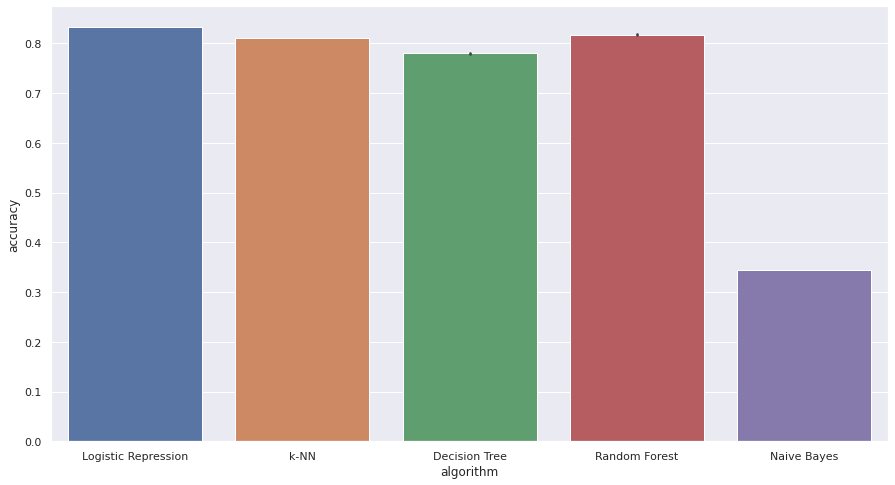

In [42]:
plt.figure(figsize = (15,8))
sns.barplot(x=results.algorithm, y=results.accuracy)